In [19]:
import pandas as pd,numpy as np,matplotlib.pyplot as plt,seaborn as sns
df = pd.read_csv("Titanic-Dataset.csv")
#loading the datasets


<Axes: >

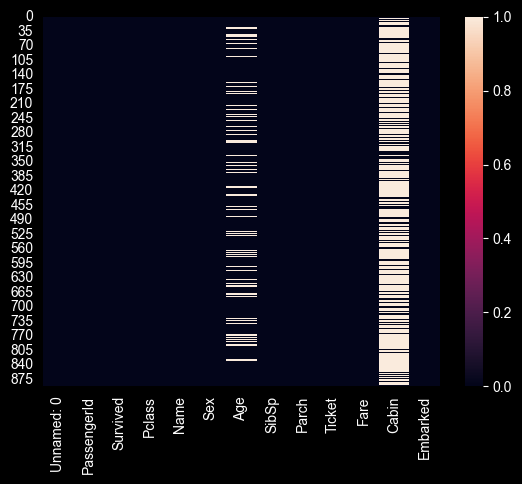

In [20]:
sns.heatmap(df.isnull())

In [21]:
#dropping on relevant columns
df = df.drop(axis= 1,columns=['PassengerId',"Name","Ticket","Cabin","Unnamed: 0"])

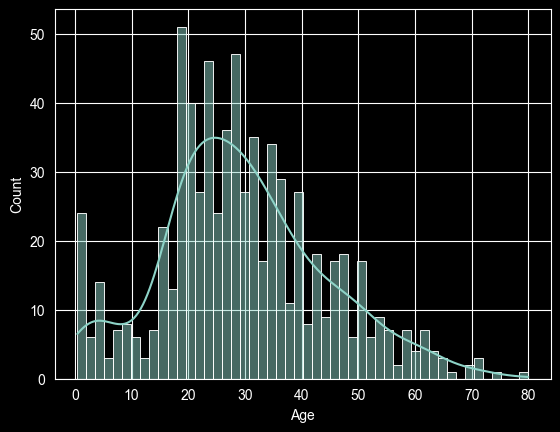

In [26]:
sns.histplot(df["Age"],bins=50,kde=True)
plt.show()

In [ ]:
#getting a count and index of how many element/entries are null in the age column
prblm = df["Age"].isna()
#subtituting those entries with median of the whole age column
df.loc[prblm,"Age"] = df["Age"].median()
#filling the rest of categorical data with the most frequent in column
df = df.fillna(df.mode().iloc[0])

In [ ]:
df.isnull().mean().mul(100)
#At this point there is no more in correct values or missing,this brought data cleaning to an end.

In [ ]:
#saving the changes made to as new file in document for more efficiency and re_usability for analysis.
df.to_csv("clean_titanic_data.csv",index=False)
df